In [1]:
from PipelineFunctionsClassification import *
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

# 1.0 Diabetic Retinopathy Dataset

In [2]:
data_arff = load_arff_file("./data/messidor_features.arff",data_type='float64',delimiter_used=',',skip_rows=24,use_cols=None)
X,y = split_data(data_arff,19,1)
X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

Dummy model: LogisticRegression()
With 73.913% train accuracy
With 70.231% test accuracy

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best estimator: LogisticRegression(C=10.0, max_iter=10000, random_state=0, solver='newton-cg')
With 75.901% train accuracy
With 73.41% test accuracy

Dummy model: SVC()
With 74.658% train accuracy
With 66.474% test accuracy

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best estimator: SVC(C=100.0, gamma=0.01, random_state=0)
With 80.621% train accuracy
With 73.121% test accuracy

Dummy model: DecisionTreeClassifier()
With 100.0% train accuracy
With 53.179% test accuracy

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=0)
With 69.814% train accuracy
With 63.584% test accuracy

Dummy model: RandomForestClassifier()
With 100.0% train accuracy
With 68.497% test accuracy

Fitting 3 folds for each of 56 candidates, totalling 168 f

/Users/davidrady/Desktop/COMP432-MLProject/classification/PipelineFunctionsClassification.py:98: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14, 4))
/Users/davidrady/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dummy model: MLPClassifier()
With 77.64% train accuracy
With 71.098% test accuracy

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best estimator: MLPClassifier(batch_size=100, hidden_layer_sizes=(10,), learning_rate_init=0.01,
              max_iter=1000, random_state=0, solver='sgd')
With 78.137% train accuracy
With 73.41% test accuracy



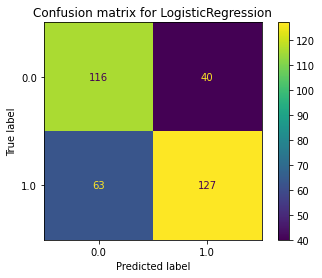

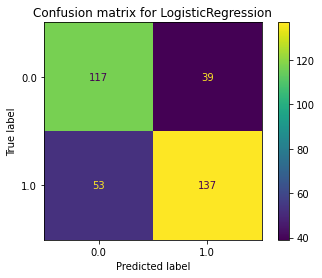

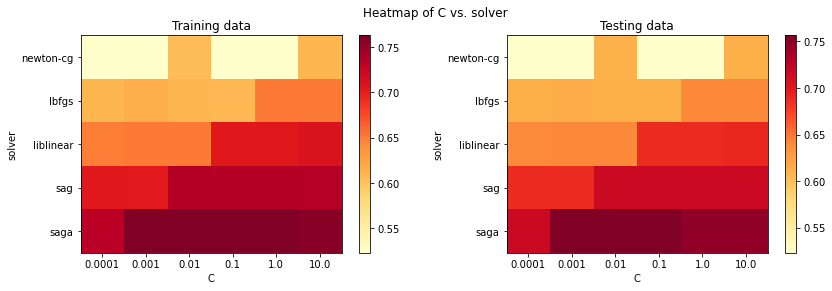

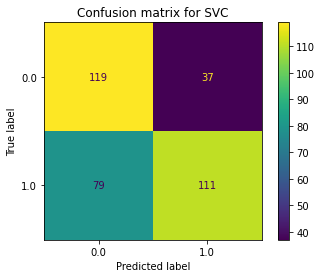

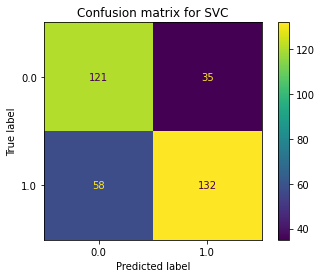

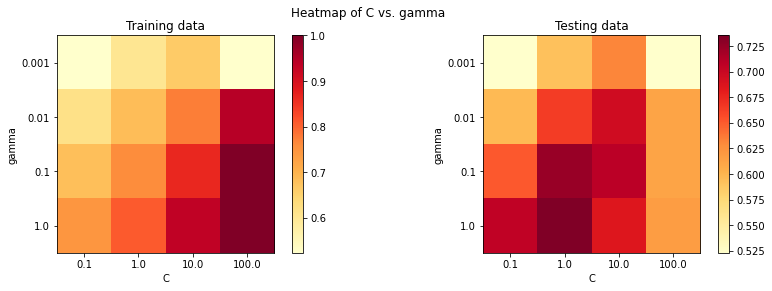

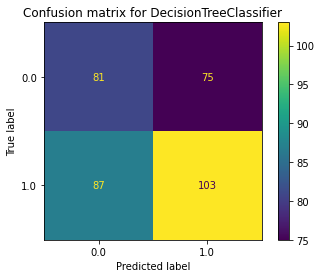

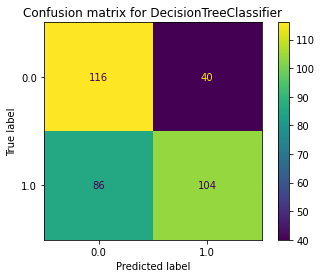

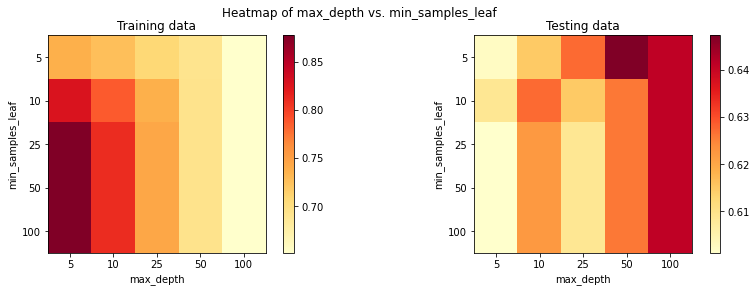

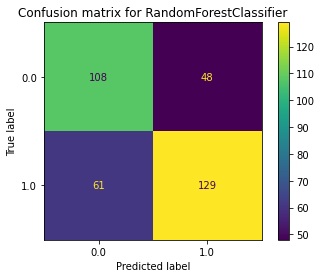

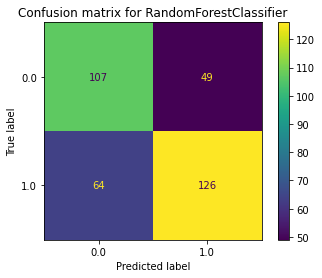

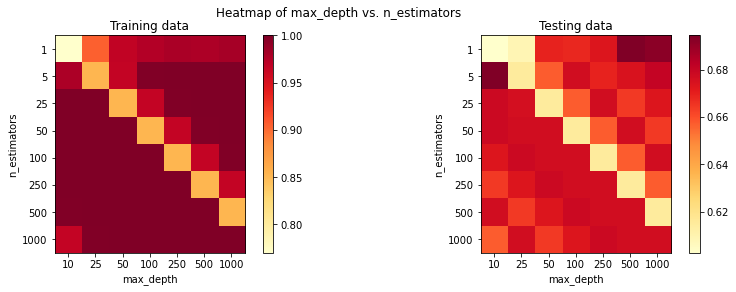

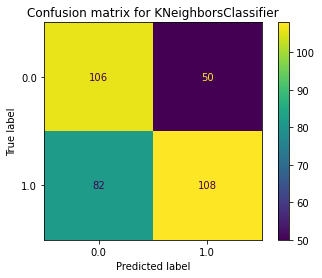

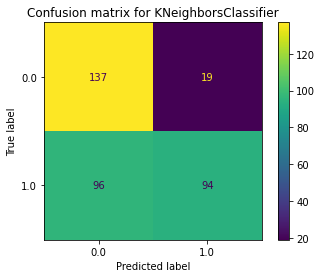

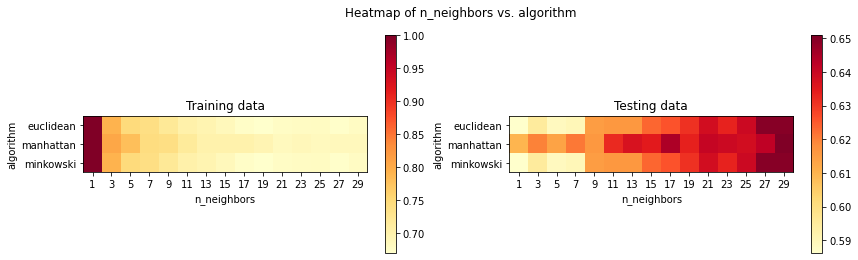

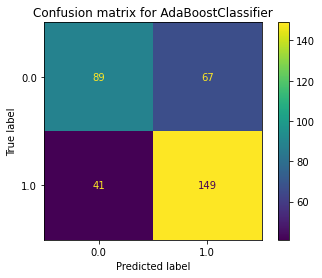

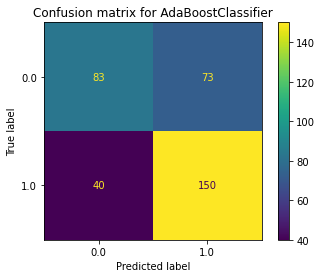

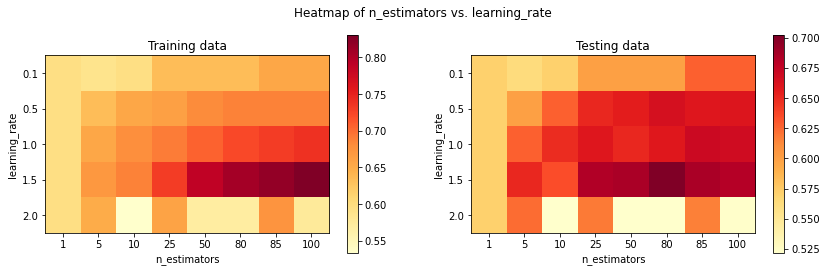

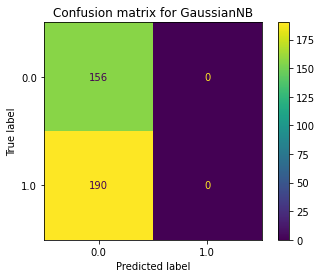

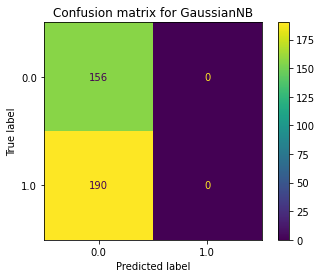

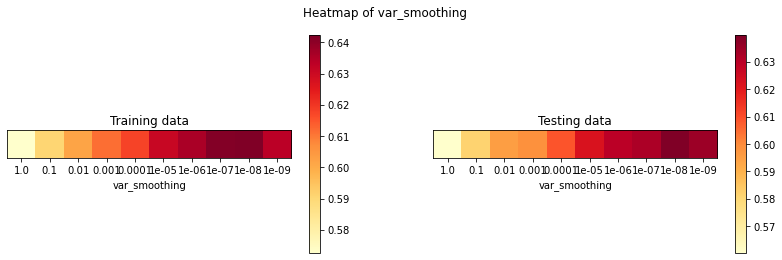

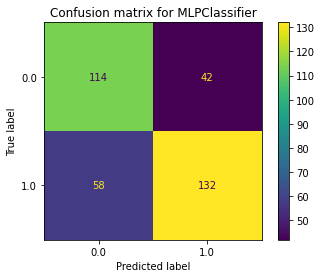

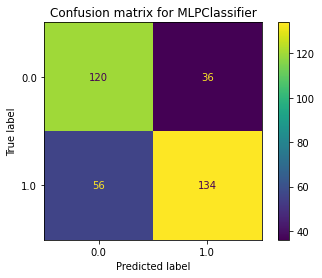

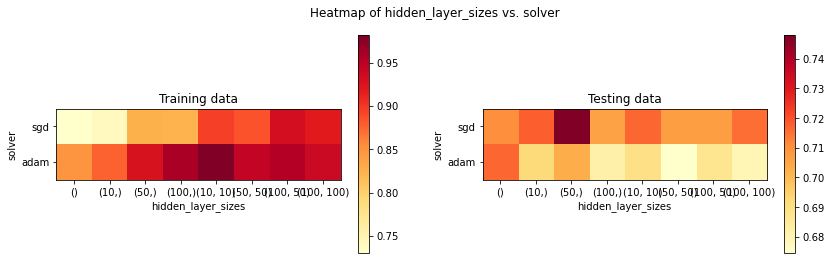

In [3]:
train_all_classifiers(X_trn,y_trn,X_tst,y_tst)

# 2.0 Default Credit Dataset

In [4]:
data_xls = load_xls_file("./data/default of credit card clients.xls",2,1)
X,y = split_data(data_xls,23,1)
y = y.astype(np.int32)
X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

In [ ]:
train_all_classifiers(X_trn,y_trn,X_tst,y_tst)

Dummy model: LogisticRegression()
With 80.767% train accuracy
With 81.8% test accuracy

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best estimator: LogisticRegression(C=0.0001, max_iter=10000, random_state=0, solver='liblinear')
With 80.933% train accuracy
With 81.078% test accuracy

Dummy model: SVC()
With 82.329% train accuracy
With 82.267% test accuracy

Fitting 3 folds for each of 16 candidates, totalling 48 fits


# 3.0 Breast Cancer Dataset

In [ ]:
# Load the data and split into features and targets, X and y
# This data is not loaded using a predefined function since it contains strings as targets, so it is dealt with differently
cols = np.arange(2,32)
X = np.loadtxt("./data/wdbc.data",usecols=cols,delimiter=',') 
y = np.loadtxt("./data/wdbc.data",dtype=str,usecols=1,delimiter=',')

# Assign 'M' (Malignant) a value 1, and 'B' (Benign) a value 0
for i in range(len(y)):
    if y[i] == 'M':
        y[i] = 1
    else: 
        y[i] = 0
        
X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

In [ ]:
train_all_classifiers(X_trn,y_trn,X_tst,y_tst)

# 4.0 Statlog German Credit Dataset

In [ ]:
# Load the data and split into features and targets, X and y
data = np.loadtxt("./data/german.data-numeric",dtype='float64')
X, y = split_data(data,24,1)
X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

In [ ]:
train_all_classifiers(X_trn,y_trn,X_tst,y_tst)

# 5.0 Adult Dataset

In [ ]:
df_adult = pd.read_csv('data/adult.data', names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary'])
df_adult_test = pd.read_csv('data/adult.test',skiprows=1, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary'])

# Drop education column since its the same data as education_num
df_adult_clean = df_adult.drop('education', axis=1)
df_adult_test_clean = df_adult_test.drop('education', axis=1)

cat_col = df_adult_clean.select_dtypes(['object']).columns
cat_col_test = df_adult_test_clean.select_dtypes(['object']).columns

df_adult_clean[cat_col] = df_adult_clean[cat_col].apply(lambda x: pd.factorize(x)[0])
df_adult_test_clean[cat_col_test] = df_adult_test_clean[cat_col_test].apply(lambda x: pd.factorize(x)[0])

data_trn = df_adult_clean.to_numpy()
data_tst = df_adult_test_clean.to_numpy()

# We don't preprocess the data for this data set because:
    # 1 - The dataset comes with a test set so no need to train_test_split
    # 2 - Most of the features are categorical instead of numerical, and thus don't require scaling
X_trn, y_trn = split_data(data_trn,13,target_location=1)
X_tst, y_tst = split_data(data_tst,13,target_location=1)

In [ ]:
train_all_classifiers(X_trn,y_trn,X_tst,y_tst)

# 6.0 Yeast Dataset

In [ ]:
data_yeast = np.loadtxt('./data/yeast.data',dtype=str)
X = data_yeast[:,1:-1]
lb_encoder = LabelEncoder()
y = lb_encoder.fit_transform(data_yeast[:,-1])
X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

In [ ]:
train_all_classifiers(X_trn,y_trn,X_tst,y_tst)

# 7.0 Thoracic Surgery Dataset

In [ ]:
data = np.loadtxt("./data/ThoraricSurgery.arff",dtype=str,skiprows=21, delimiter = ',')

# Account for the categorical data in columns 0,3,9
column_trans = make_column_transformer((OneHotEncoder(),[0,3,9]),remainder='passthrough')
data = column_trans.fit_transform(data)

X, y = split_data(data,16,target_location=1)

# Assign 'T' (True) a value 1, and 'F' (False) a value 0
for i in range(len(y)):
    if y[i] == 'T':
        y[i] = 1
    else: 
        y[i] = 0
X = X.astype(np.float64)
y = y.astype(np.int32)

X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

In [ ]:
train_all_classifiers(X_trn, y_trn, X_tst, y_tst)

# 8.0 Seismic Bumps Dataset

In [ ]:
data = np.loadtxt("./data/seismic-bumps.arff",dtype=str,delimiter=',', skiprows=154) 
# Account for the categorical data in columns 0,1,2,7
column_trans = make_column_transformer((OneHotEncoder(),[0,1,2,7]),remainder='passthrough')
data = column_trans.fit_transform(data)
X, y = split_data(data,24,target_location=1)
X = X.astype(np.float64)
y = y.astype(np.int32)
X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

In [ ]:
train_all_classifiers(X_trn,y_trn,X_tst,y_tst)